Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset

In [ ]:
df1 = pd.read_csv('/content/Price.csv')
df2= pd.read_csv('/content/personal.csv')

In [ ]:
df1.keys()

Index(['Policy no.', 'age', 'sex', 'bmi', 'charges in INR'], dtype='object')

In [ ]:
df2.keys()

Index(['Policy no.', 'children', 'smoker', 'region'], dtype='object')

merge dataset

In [ ]:
data = pd.merge(df1,df2,on='Policy no.')

In [ ]:
data.keys()

Index(['Policy no.', 'age', 'sex', 'bmi', 'charges in INR', 'children',
       'smoker', 'region'],
      dtype='object')

In [ ]:
data.rename(columns={'Policy no.':'Policy_no','sex':'gender','charges in INR':'Charges'},inplace=True)

In [ ]:
data.dtypes

,0
Policy_no,object
age,int64
gender,object
bmi,float64
Charges,float64
children,int64
smoker,object
region,object


check for null and duplicates

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

,0
Policy no.,0
age,0
sex,0
bmi,0
charges in INR,0
children,0
smoker,0
region,0



# Does the gender of the person matter for the company as a constraint for
# extending policies?


In [ ]:
gender_charges = data.groupby('gender')['Charges'].mean()
gender_charges


,Charges
gender,
female,12569.578844
male,13956.751178


Plot the graph

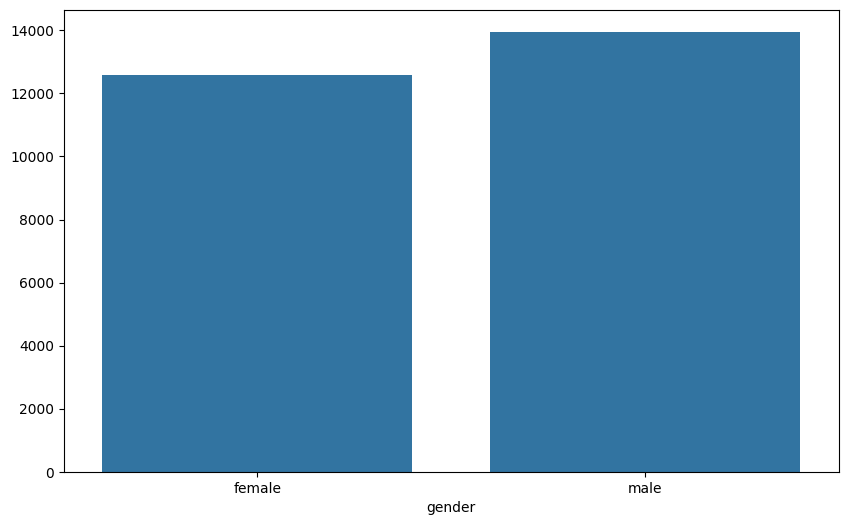

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=gender_charges.index,y=gender_charges.values)
plt.show()

# What is the average amount of money the company spent over each policycover?


In [ ]:
avg_amount = data['Charges'].mean()
avg_amount

13270.422265141257

plot histogram

<Axes: xlabel='Charges', ylabel='Count'>

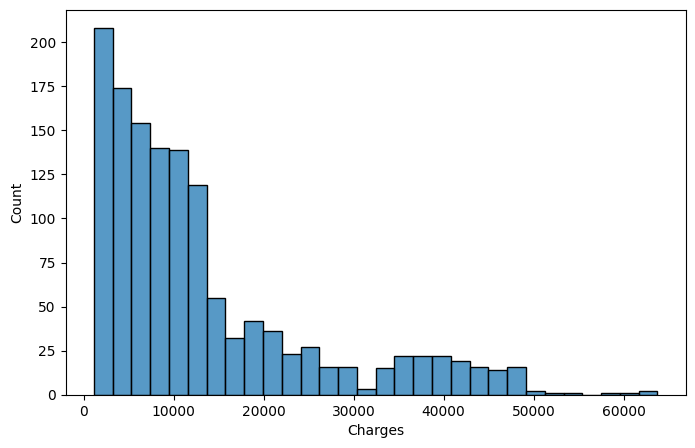

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x=data['Charges'])



# Could you advice if the company needs to offer separate policies based upon the geographic location of the person?


In [ ]:
location_charges = data.groupby('region')['Charges'].mean().sort_values(ascending=False)
location_charges

,Charges
region,
southeast,14735.411438
northeast,13406.384516
northwest,12417.575374
southwest,12346.937377


In [ ]:
data.keys()

Index(['Policy_no', 'age', 'gender', 'bmi', 'Charges', 'children', 'smoker',
       'region'],
      dtype='object')

plot the bar

<Axes: xlabel='region'>

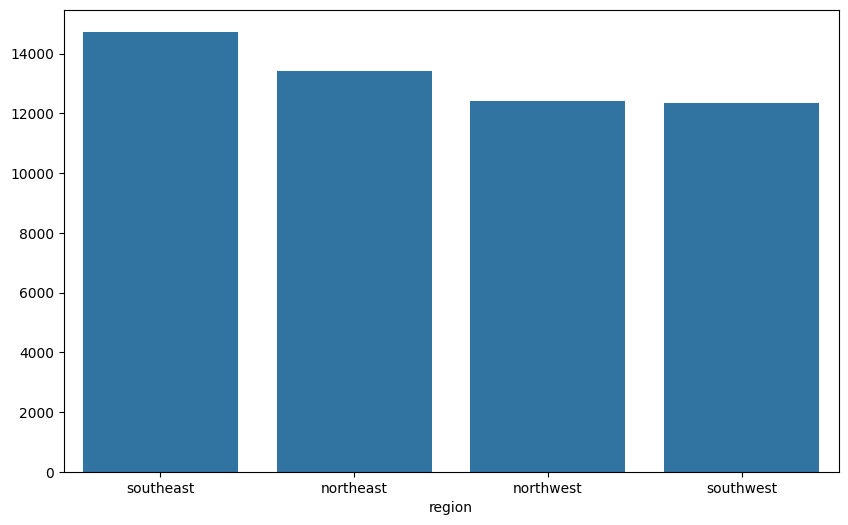

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=location_charges.index,y=location_charges.values)

# Does the no. of dependents make a difference in the amount claimed?


In [ ]:
children_charges= data.groupby('children')['Charges'].mean().sort_values(ascending=False)
children_charges

,Charges
children,
3,15355.318367
2,15073.563734
4,13850.656311
1,12731.171832
0,12365.975602
5,8786.035247


In [ ]:
data.keys()

Index(['Policy_no', 'age', 'gender', 'bmi', 'Charges', 'children', 'smoker',
       'region'],
      dtype='object')

Plot the graph

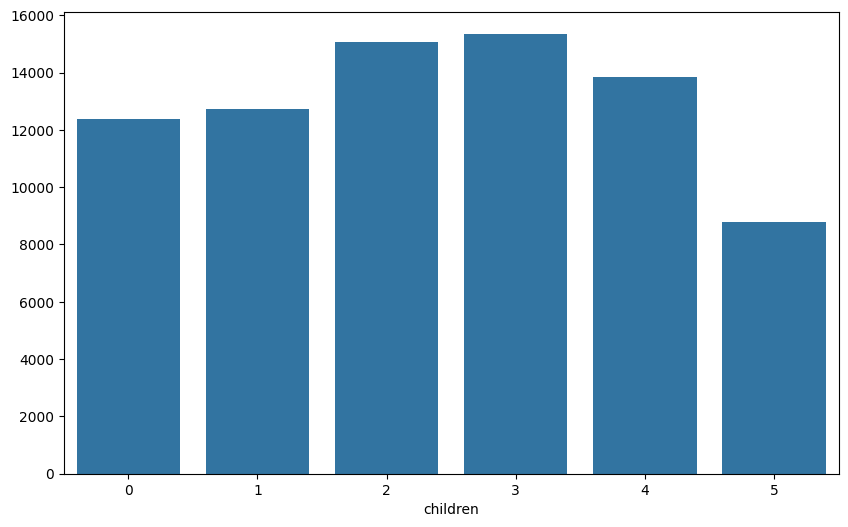

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=children_charges.index,y=children_charges.values)
plt.show()

# Does a study of persons BMI get the company any idea for the insurance claim  that it would extend?

In [ ]:
bmi_charges = data.groupby('bmi_group')['Charges'].mean().sort_values(ascending=False)
bmi_charges

<ipython-input-52-66ce624aa70c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_charges = data.groupby('bmi_group')['Charges'].mean().sort_values(ascending=False)


,Charges
bmi_group,
high,17771.939111
medium,16890.999762
normal,14746.077273
above high,13783.433360
low,11193.005487
very low,9773.631152
minimum,7576.420217
maximum,NaN


In [ ]:
data['bmi_group']=pd.cut(data['bmi'],bins=[15,18,24,30,36,42,48,54,float('inf')],labels=['minimum','very low','low','normal','medium','high','above high','maximum'])

plot scatterplot with hue

<Axes: xlabel='bmi_group', ylabel='Charges'>

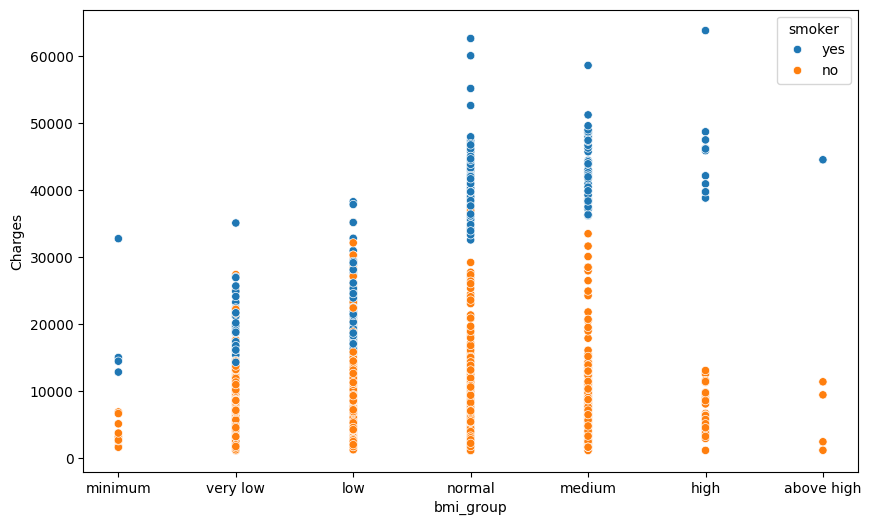

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='bmi_group',y='Charges',hue='smoker')

# Is it needed for the company to understand whether the person covered is a smoker or a non-smoker?


In [ ]:
smoker_charges = data.groupby('smoker')['Charges'].mean().sort_values(ascending=False)
smoker_charges

,Charges
smoker,
yes,32050.231832
no,8434.268298


Plot graph

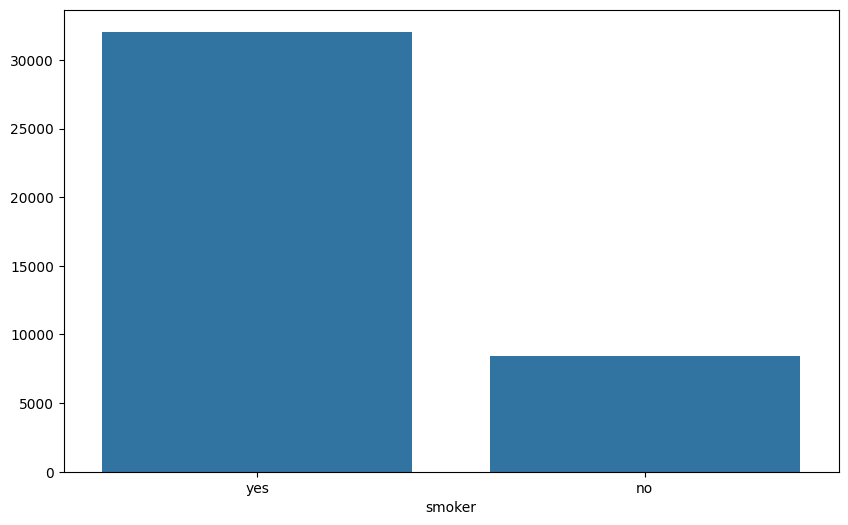

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=smoker_charges.index,y=smoker_charges.values)
plt.show()

# Is it needed for the company to understand whether the person covered is a smoker or a non-smoker?

In [ ]:
bmi_charges1 = data.groupby('bmi')['Charges'].mean().sort_values(ascending=False)
bmi_charges1

,Charges
bmi,
47.41,63770.42801
30.36,62592.87309
36.40,51194.55914
36.96,49577.66240
37.70,48824.45000
...,...
35.40,1263.24900
20.70,1242.81600
20.30,1242.26000


Plot graph

<Axes: xlabel='bmi', ylabel='Charges'>

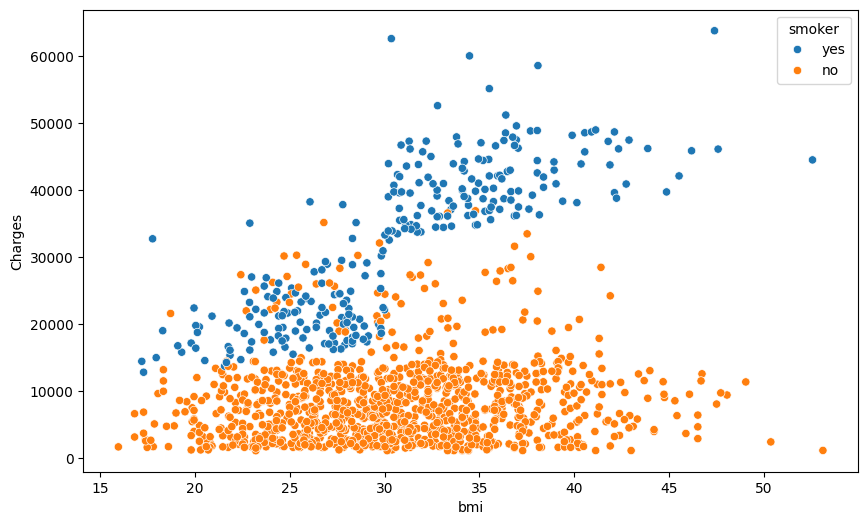

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi',y='Charges',hue='smoker',data=data)

#Does age have any barrier on the insurance claimed?

In [ ]:
data['age'].unique()


array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [ ]:
data['age_group']=pd.cut(data['age'],bins=[18,25,30,35,40,50,62,float('inf')],labels=['teen','very young','young','adult','middle','old','very-old'])

In [ ]:
age_charges = data.groupby('age_group')['Charges'].mean().sort_values(ascending=False)
age_charges

<ipython-input-67-065772b5a269>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_charges = data.groupby('age_group')['Charges'].mean().sort_values(ascending=False)


,Charges
age_group,
very-old,21542.592067
old,17584.690702
middle,14782.043077
adult,12366.022844
young,10929.364789
very young,10086.132420
teen,9669.526690


Plot graph

<Axes: xlabel='age_group', ylabel='Charges'>

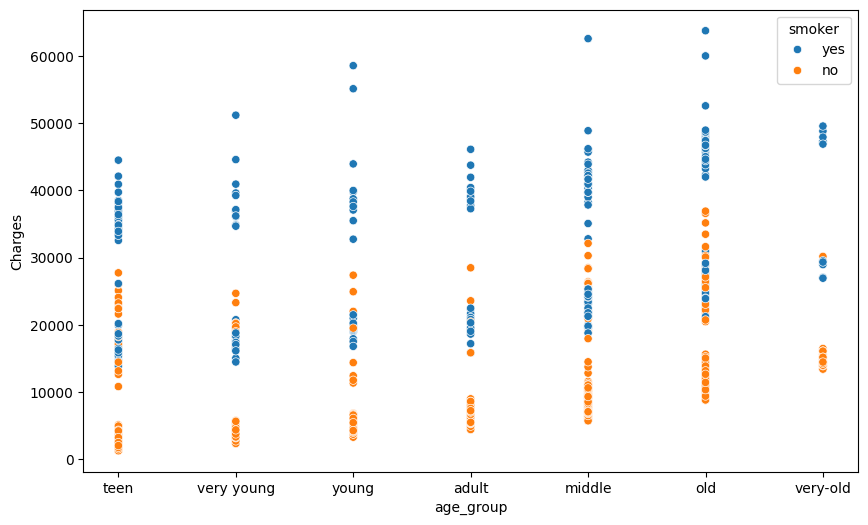

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='age_group',y='Charges',hue='smoker')

#Can the company extend certain discounts after checking the health status (BMI) in this case?

In [ ]:
data.keys()

Index(['Policy_no', 'age', 'gender', 'bmi', 'Charges', 'children', 'smoker',
       'region', 'bmi_group', 'age_group'],
      dtype='object')

plot graph